##### http://www.scikitlearn.com.cn/ 官网学习中文翻译
##### https://scikit-learn.org/stable/modules/svm.html#density-estimation-novelty-detection 官网学习英文

##### 对于过拟合和欠拟合的理解https://blog.csdn.net/weixin_42575020/article/details/82949285

### 复现课件中线性SVM、决策树、朴素贝叶斯分类的示例，并相对课件代码作出如下作图修改（必做）（80分）
#### 1. 设定支持向量分类器的惩罚为0.05
######  C是调节间隔与准确率的因子，C值越大，越不愿放弃那些离群点；c值越小，越不重视那些离群点
###### 参考文章 https://blog.csdn.net/ustbbsy/article/details/82390281
##### 2. 对朴素贝叶斯分类器的先验概率进行设定（可随机设定）
##### 贝叶斯方法的特点是结合先验概率和后验概率，即避免了只使用先验概率的主观偏见，也避免了单独使用样本信息的过拟合现象
###### 参考文章https://blog.csdn.net/ccblogger/article/details/81712351
###### 参考原理步骤https://www.cnblogs.com/rongyux/p/5388752.html
##### 3. 在每张结果图上展示图例
##### 修改散点颜色为黄和绿
##### 测试结果的正确率保留三位小数展示

###### 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
#随机划分训练集、测试集
from sklearn.preprocessing import StandardScaler
#标准化数据集
#导入三种分别的数据集，都是具体数据函数生成
from sklearn.datasets import make_moons,make_circles,make_classification

###### 导入支持向量分类器&设置分类器参数

In [2]:
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器

#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.05),
    DecisionTreeClassifier(random_state=0,max_depth=5),
    GaussianNB(priors=[0.4,0.6])]


sklearn.datasets.make_classification
(
n_samples=100, 
n_features=20, 特征个数= n_informative + n_redundant + n_repeated
n_informative=2, 多信息特征的个数
n_redundant=2, 冗余信息，informative特征的随机线性组合
n_repeated=0, 重复信息，随机提取n_informative和n_redundant 特征
n_classes=2, 分类类别
n_clusters_per_class=2, 某一个类别是由几个cluster构成的
weights=None,列表类型，权重比             
flip_y=0.01,                           
class_sep=1.0,乘以超立方体大小的因子。 较大的值分散了簇/类，并使分类任务更容易。默认为1
hypercube=True,shift=0.0, scale=1.0,                      
shuffle=True, 
random_state=None  如果是int，random_state是随机数发生器使用的种子; 如果RandomState实例，random_state是随                         机数生成器; 如果没有，则随机数生成器是np.random使用的RandomState实例。
)
功能：生成样本集，通常用于分类算法
返回值：
X：形状数组[n_samples，n_features]
生成的样本。
y：形状数组[n_samples]
每个样本的类成员的整数标签。

In [3]:
#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
#print(X,y)
#生成X：形状[n_samples，n_features]生成的样本。y：形状数组[n_samples]每个样本的类成员的整数标签。
#这里类别为2（没有分支） 特征为2

In [4]:
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集
print(linearly_separable)

(array([[-0.17749658,  0.93049627],
       [ 1.97742406,  1.76615529],
       [ 1.80002379,  1.7003428 ],
       [-0.77083686,  2.35916348],
       [-0.30800901,  1.59406316],
       [ 0.61472141,  2.43489824],
       [ 1.0909431 ,  2.21663402],
       [-0.83488954,  2.35868875],
       [ 2.47946499,  1.33418967],
       [ 1.19926597,  1.82681392],
       [ 2.18506184,  0.8226875 ],
       [ 1.68423203,  1.0411311 ],
       [ 1.14621135,  2.07048527],
       [ 1.35596945,  0.56802498],
       [ 1.38520748,  1.82607238],
       [ 1.86729217,  1.18692699],
       [ 0.31227376,  2.24605353],
       [-0.08183484,  1.70065511],
       [ 0.90484472,  2.60683016],
       [-0.4358609 ,  2.0151414 ],
       [ 0.81441196,  2.13546784],
       [ 3.10874312,  2.26786504],
       [-0.25574217,  1.71281146],
       [ 1.88663027,  2.72089513],
       [ 2.29503547,  3.89267759],
       [-0.11415626,  0.85593357],
       [ 1.69703537,  3.47717799],
       [ 1.83855775,  0.92667213],
       [ 1.60298807

#### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html--make_moons数据呈月牙状
#### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html--make_circles数据呈环状

In [5]:
#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
print(datasets)


[(array([[-0.05348369,  0.99258199],
       [ 1.81989987, -0.17559999],
       [ 0.95535658,  0.05999942],
       [ 0.01558147,  0.11081703],
       [ 0.96454939, -0.51276464],
       [ 1.98889686,  0.30384984],
       [ 0.53549261,  0.68257563],
       [ 0.92004283, -0.58127765],
       [ 0.01206304,  0.29518806],
       [ 1.88346177,  0.28446179],
       [-0.08064949,  0.41062938],
       [ 1.93512761, -0.05897236],
       [ 1.31504601, -0.56540653],
       [ 0.85667004,  0.89282872],
       [ 0.75641531,  0.4715998 ],
       [-0.35242078,  0.99888439],
       [ 0.20681479,  1.06917351],
       [ 0.12280354,  0.94090393],
       [-0.42463668,  0.82968195],
       [ 0.96867858,  0.51144583],
       [-0.81695256,  0.4692567 ],
       [ 0.34228955, -0.19550647],
       [ 0.88254314,  0.37839804],
       [ 0.75337171, -0.46959342],
       [-0.86421327,  0.12595569],
       [-0.91417342, -0.08494092],
       [ 0.81989526,  0.35435414],
       [ 2.06045723,  0.32569418],
       [ 1.6149609

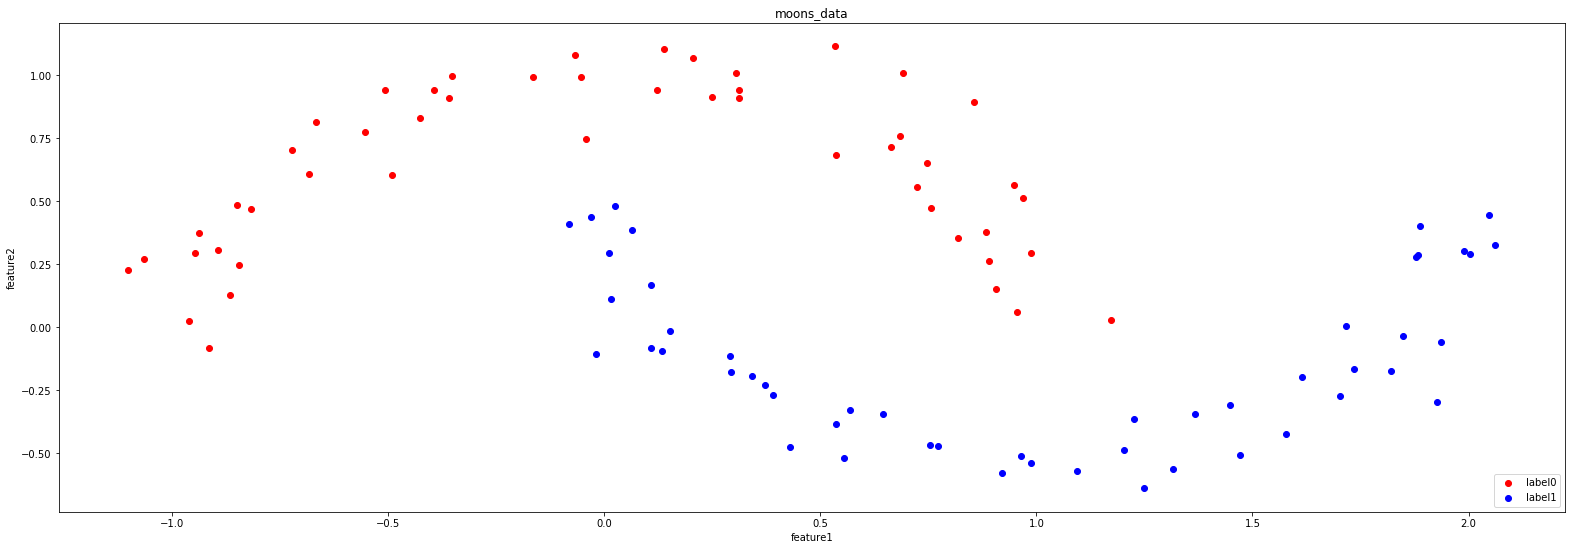

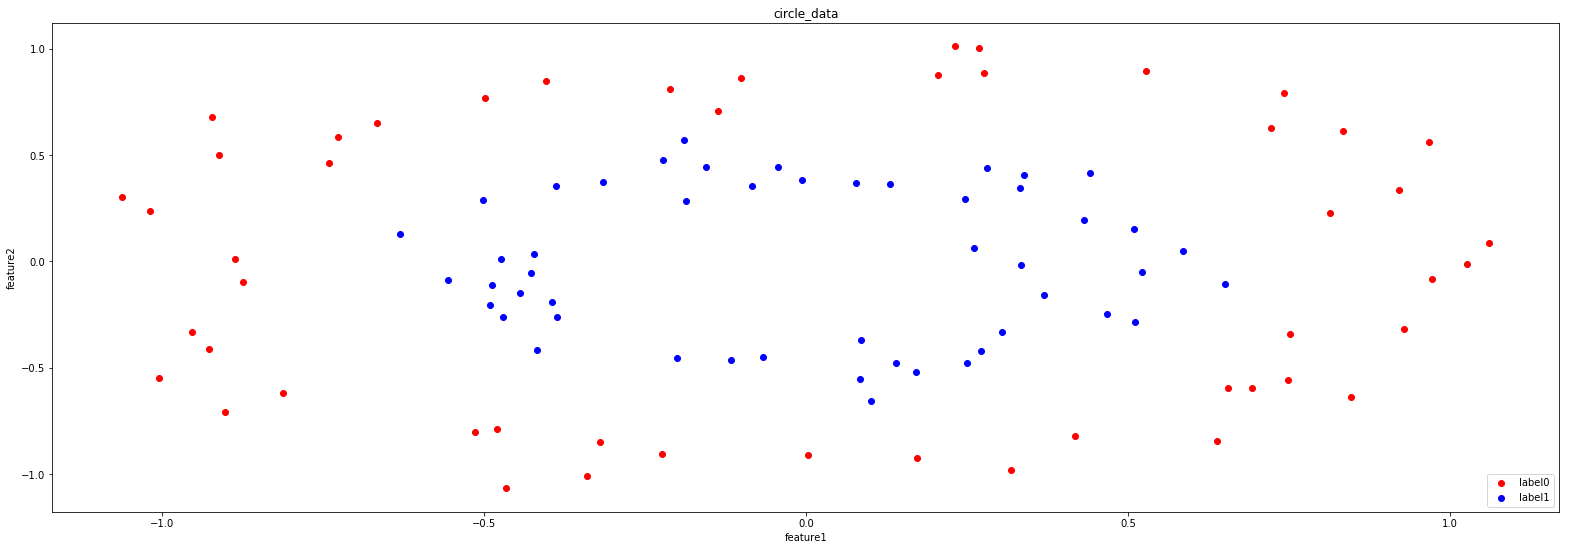

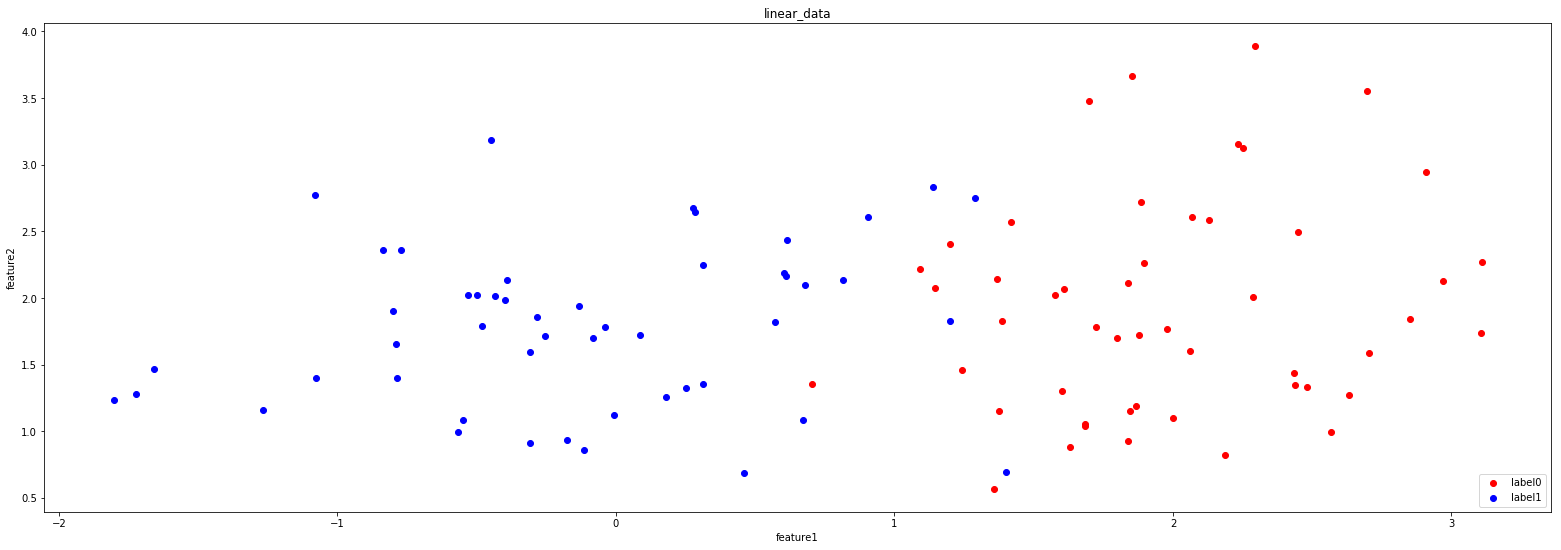

In [6]:
#设置显示结果图的大小
#print(datasets[0][1])
#0代表标签为0，1代表标签为1...2,3,4,5以此类推
x0=[]
x1=[]
y0=[]
y1=[]
for i in range (0,100):
    if datasets[0][1][i]==0:
        x0.append(datasets[0][0][i,0])
        y0.append(datasets[0][0][i,1])
    else:
        x1.append(datasets[0][0][i,0])
        y1.append(datasets[0][0][i,1])
#print(x0)
figure1=plt.figure(figsize=(27,9))
plt.title('moons_data') #标题
plt.xlabel('feature1') #x轴坐标
plt.ylabel('feature2')  #y轴坐标
plt.scatter(x0,y0,c="red",label="label0")
plt.scatter(x1,y1,c="blue",label="label1")
plt.legend(loc=4) #左上角 1右上角 2左上角 3左下角 4右下角

x2=[]
x3=[]
y2=[]
y3=[]
for i in range (0,100):
    if datasets[1][1][i]==0:
        x2.append(datasets[1][0][i,0])
        y2.append(datasets[1][0][i,1])
    else:
        x3.append(datasets[1][0][i,0])
        y3.append(datasets[1][0][i,1])
figure2=plt.figure(figsize=(27,9))
plt.title('circle_data') #标题
plt.xlabel('feature1') #x轴坐标
plt.ylabel('feature2')  #y轴坐标
plt.scatter(x2,y2,c="red",label="label0")
plt.scatter(x3,y3,c="blue",label="label1")
plt.legend(loc=4) #左上角 1右上角 2左上角 3左下角 4右下角


x4=[]
x5=[]
y4=[]
y5=[]
for i in range (0,100):
    if datasets[2][1][i]==0:
        x4.append(datasets[2][0][i,0])
        y4.append(datasets[2][0][i,1])
    else:
        x5.append(datasets[2][0][i,0])
        y5.append(datasets[2][0][i,1])
figure3=plt.figure(figsize=(27,9))
plt.title('linear_data') #标题
plt.xlabel('feature1') #x轴坐标
plt.ylabel('feature2')  #y轴坐标
plt.scatter(x4,y4,c="red",label="label0")
plt.scatter(x5,y5,c="blue",label="label1")
plt.legend(loc=4) #左上角 1右上角 2左上角 3左下角 4右下角


### 补充1
##### X_train,X_test, y_train, y_test =sklearn.model_selection.train_test_split(train_data,train_target,test_size, random_state,stratify=y_train)函数讲解
###### train_data：所要划分的样本特征集
###### train_target：所要划分的样本结果
###### test_size：样本占比，如果是整数的话就是样本的数量
###### random_state：是随机数的种子。
###### 随机数种子：其实就是该组随机数的编号，在需要重复试验的时候，保证得到一组一样的随机数。比如你每次都填1，其他参数一样的情况下你得到的随机数组是一样的。但填0或不填，每次都会不一样。
stratify是为了保持split前类的分布。比如有100个数据，80个属于A类，20个属于B类。如果train_test_split(... test_size=0.25, stratify = y_all), 那么split之后数据如下： 
training: 75个数据，其中60个属于A类，15个属于B类。 
testing: 25个数据，其中20个属于A类，5个属于B类。 
用了stratify参数，training集和testing集的类的比例是 A：B= 4：1，等同于split前的比例（80：20）。通常在这种类分布不平衡的情况下会用到stratify。
将stratify=X就是按照X中的比例分配 
将stratify=y就是按照y中的比例分配 
  

### 补充2
##### Bases: matplotlib.colors.Colormap函数讲解
###### Colormap object generated from a list of colors.
###### This may be most useful when indexing directly into a colormap, but it can also be used to generate special colormaps for ordinary mapping.

### 补充3
##### scikit-learn工具包中分类模型predict_proba、predict、decision_function用法详解
https://blog.csdn.net/cxx654/article/details/106727812
###### clf.decision_function
The confidence score for a sample is the signed distance of that sample to the hyperplane.”。
##### Python Numpy模块函数np.c_和np.r_ 
np.r_：是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等，类似于pandas中的concat()。
np.c_：是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等，类似于pandas中的merge()。

int64
(60, 2) (60,)
(60, 2) (60,)
(60, 2) (60,)
int64
(60, 2) (60,)
(60, 2) (60,)
(60, 2) (60,)
int32
(60, 2) (60,)
(60, 2) (60,)
(60, 2) (60,)


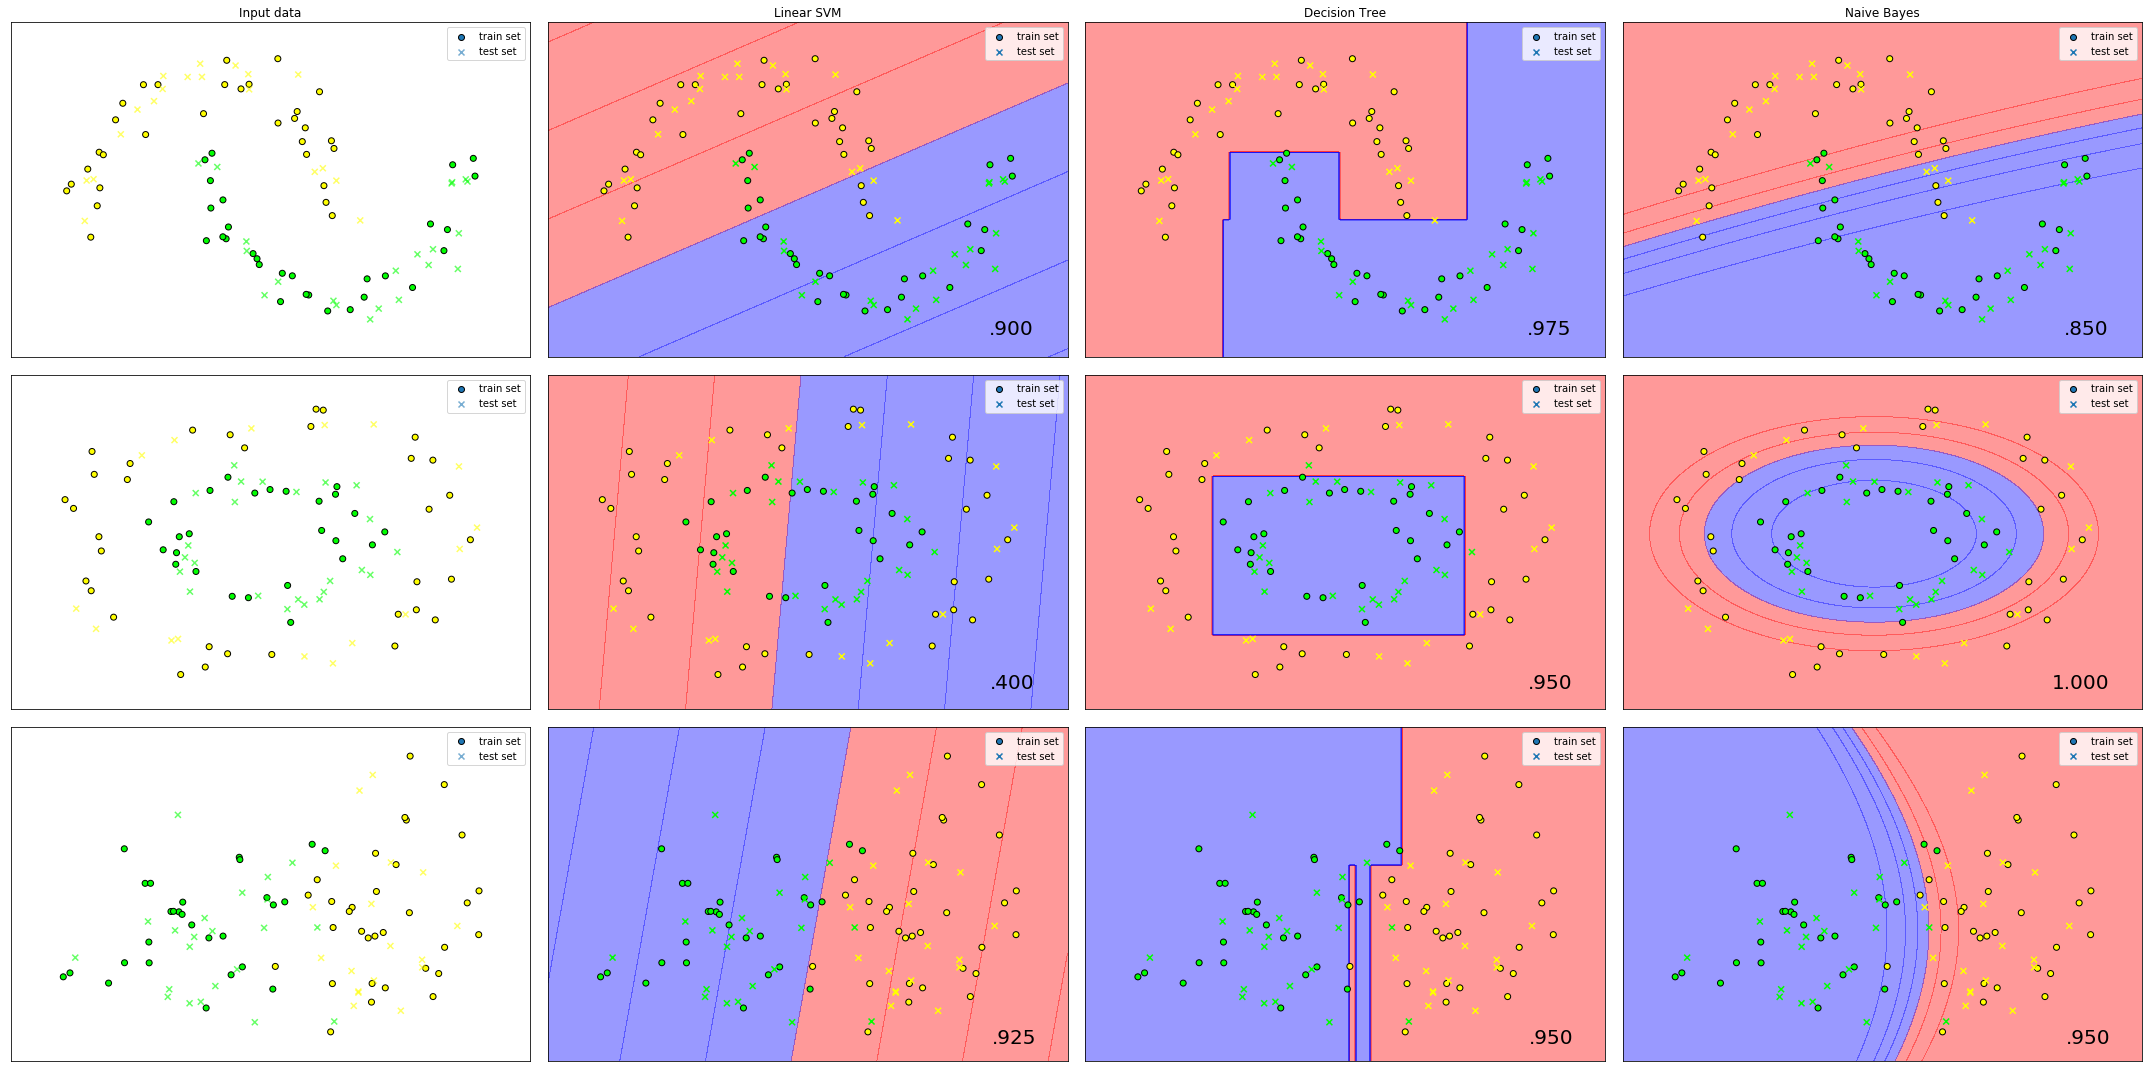

In [7]:
#设置显示结果图的大小
figure=plt.figure(figsize=(30,15))
i=1
for ds_cnt,ds in enumerate(datasets):
#enumerate()函数:用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    #处理数据集
    #print(ds)--ds代表对应的数据，共有3组
    #print(ds_cnt)--ds_cnt代表对应的组号，分别为0，1，2
    X,y=ds#X为特征，y为标签,循环3次，每次为1次标签
    #print(i,"  ",X,'\n')
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5 #取第一个取值特征范围作为横轴
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5 #取第二个取值特征范围作为纵轴
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h), #按步长在横纵轴上设置网络
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FFFF00','#00FF00'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面 3 4 1    345   349分别为第1，5，9子图
    #print(len(datasets),len(classifiers)+1,i)
    if ds_cnt==0:
        ax.set_title("Input data")#初始标题
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    print(y_train.dtype)
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc = 1)#添加图例
    i+=1
    for name,clf in list(zip(names,classifiers)):#name ,classifiers为初始定义的类别
        #print(name,classifiers)
        #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        #print(len(datasets),len(classifiers)+1,i) 232 233 234
        clf.fit(X_train,y_train)#训练集训练分类器
        print(X_train.shape,y_train.shape)
        score=clf.score(X_test,y_test)#测试集测试分类器
        #hasattr用于是否包含属性的判定
        if hasattr(clf,"decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        #将分类结果利用contourf（等高线）函数画出
        Z=Z.reshape(xx.shape)#形状的统一
        #print(Z.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.4)#等高线的绘制
        #画训练集点
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
                   edgecolors='k',marker='o',label='train set')
        #画测试集点
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,
                   edgecolors='k',marker='x',label='test set')
        #画坐标轴
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend(loc = 1)#添加图例
        if ds_cnt==0:
            #画子图标题
            ax.set_title(name)
            #显示测试正确率
        ax.text(xx.max()-.3,yy.min()+.3,('%.3f'% score).lstrip('0'), 
                size=20,horizontalalignment='right')
        i += 1

#分别对每个数据集做训练及测试

 
plt.tight_layout()
plt.show()

### 创新与拓展（选作）：
1. 自主选取其他的数据集，采用上述三类分类器进行分类，展示分类结果（20分）
2. 探究分类器的参数对于分类结果的影响并进行文字分析（选做）
如：
###### DecisionTreeClassifier(max_depth=5)中max_depth设置对于结果的影响（如过拟合或者欠拟合）
###### 朴素贝叶斯分类器的先验概率修改对于分类的影响
###### 支持向量分类器不同核函数对于结果的影响
###### 参数不限制于课件中代码所用到的参数，可以探究其他的参数
###### 其他分类方法的效果的对比分析（K近邻，随机森林等）

### 1.自主选择数据集
###### 本次拓展实验选择的数据集为为sklearn库中的鸢尾花数据集，其中选用数据中的sepal length in cm和sepal width in cm作为特征值，同时选取类别中的SetosaIris和Versicolour作为标签，即选择前100个数据利用三类分类器进行分类并展示结果。

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树分类器
from sklearn.naive_bayes import GaussianNB#先验为高斯分布的朴素贝叶斯分类器
#导入鸢尾花数据集
from sklearn.datasets import load_iris   #导入数据集iris
iris = load_iris().data  #载入数据集
#data = np.array( iris[:100,:2])#获取花卉两列数据集
#y = np.array(load_iris().target[:100])
data = iris[:100,:2]#获取花卉两列数据集
y = load_iris().target[:100]
print(data.shape,y.shape)
#设置显示结果的图的标题
names=["Linear SVM","Decision Tree","Naive Bayes"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.05),
    DecisionTreeClassifier(random_state=0,max_depth=5),
    GaussianNB(priors=[0.5,0.5])]


(100, 2) (100,)


[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
(80, 2) (80,)
(80, 2) (80,)
(80, 2) (80,)


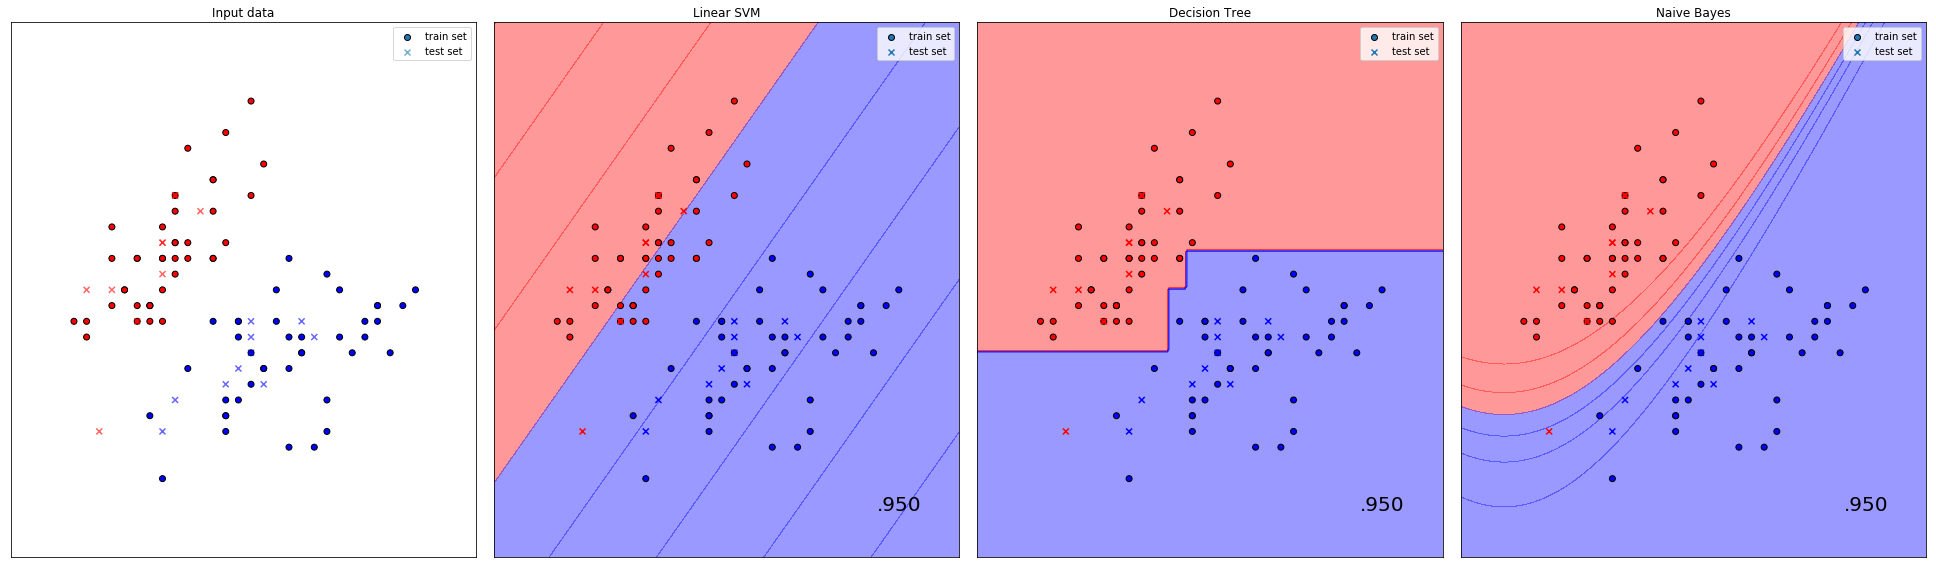

In [35]:
#设置显示结果图的大小
ii=1
figure=plt.figure(figsize=(27,8))
X_train=[]
X_test=[]
y_train =[]
y_test=[]
for i in range (0,40):
    X_train.append(data[i,:])
    X_train.append(data[i+50,:])
    y_train.append(y[i])
    y_train.append(y[i+50])
for i in range (40,50):
    X_test.append(data[i,:])
    X_test.append(data[i+50,:])
    y_test.append(y[i])
    y_test.append(y[i+50])
print(y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_min,x_max=data[:,0].min()-.5,data[:,0].max()+.5 #取第一个取值特征范围作为横轴
y_min,y_max=data[:,1].min()-.5,data[:,1].max()+.5 #取第二个取值特征范围作为纵轴
h=.02 #设置网络的步长
xx,yy=np.meshgrid(np.arange(x_min,x_max,h), #按步长在横纵轴上设置网络
                  np.arange(y_min,y_max,h))
#先展示输入数据集
cm=ListedColormap((['red','blue']))#设置分割面颜色
cm_bright=ListedColormap(['#FF0000','#0000FF'])#设置散点颜色
ax=plt.subplot(1,4,1)#划分子面 3 4 1    345   349分别为第1，5，9子图
#print(len(datasets),len(classifiers)+1,i)
if ii==1:
    ax.set_title("Input data")#初始标题
    #画训练集散点
ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
           edgecolors='k',marker='o',label='train set')
#画测试集散点
ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
           edgecolors='k',marker='x',label='test set')
#画坐标轴
ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.legend(loc = 1)#添加图例
ii+=1
for name,clf in list(zip(names,classifiers)):#name ,classifiers为初始定义的类别
    #print(name,classifiers)
    #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
    ax=plt.subplot(1,4,ii)
    print(X_train.shape,y_train.shape)
    clf.fit(X_train,y_train)#训练集训练分类器
    score=clf.score(X_test,y_test)#测试集测试分类器
    #hasattr用于是否包含属性的判定
    if hasattr(clf,"decision_function"):
        Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
    else:
        Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
    #将分类结果利用contourf（等高线）函数画出
    Z=Z.reshape(xx.shape)#形状的统一
    #print(Z.shape)
    ax.contourf(xx,yy,Z,cmap=cm,alpha=.4)#等高线的绘制
    #画训练集点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    #画测试集点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc = 1)#添加图例
    #画子图标题
    ax.set_title(name)
    ax.text(xx.max()-.3,yy.min()+.3,('%.3f'% score).lstrip('0'), 
                size=20,horizontalalignment='right')
    ii += 1

#分别对每个数据集做训练及测试
 
plt.tight_layout()
plt.show()

### 2.1 DecisionTreeClassifier(max_depth=5)中max_depth设置对于结果的影响（如过拟合或者欠拟合）

####  参考文章 https://blog.csdn.net/qq_41577045/article/details/79844709

##### 数据量为100，深度为10，5，2

int64
(60, 2) (60,)
(60, 2) (60,)
(60, 2) (60,)
int64
(60, 2) (60,)
(60, 2) (60,)
(60, 2) (60,)
int32
(60, 2) (60,)
(60, 2) (60,)
(60, 2) (60,)


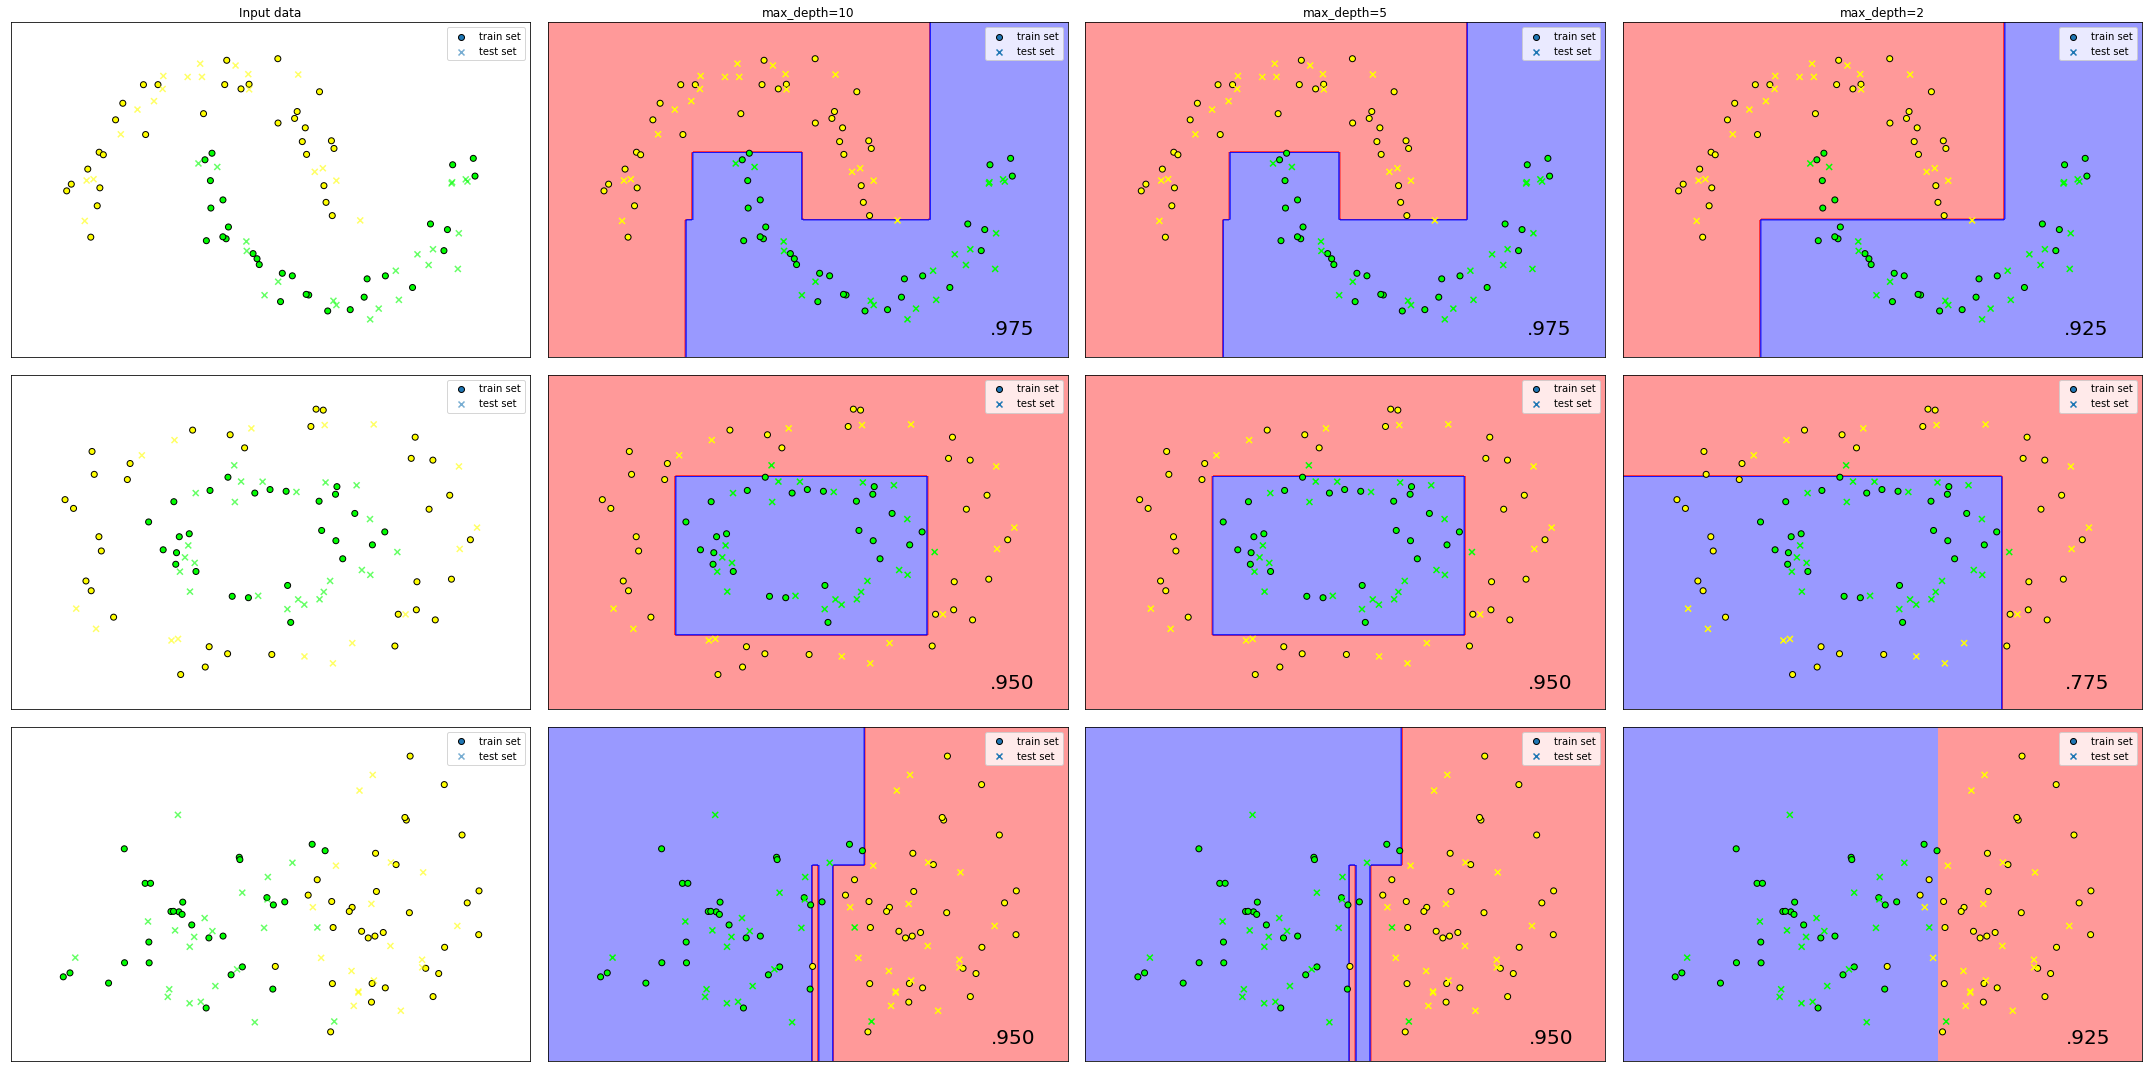

In [14]:
#设置显示结果的图的标题
names=["max_depth=10","max_depth=5","max_depth=2"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    DecisionTreeClassifier(random_state=0,max_depth=10),
    DecisionTreeClassifier(random_state=0,max_depth=5),
    DecisionTreeClassifier(random_state=0,max_depth=2),]
#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
#print(X,y)
#生成X：形状[n_samples，n_features]生成的样本。y：形状数组[n_samples]每个样本的类成员的整数标签。
#这里类别为2（没有分支） 特征为2
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集
#print(linearly_separable)
#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(30,15))
i=1
for ds_cnt,ds in enumerate(datasets):
#enumerate()函数:用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    #处理数据集
    #print(ds)--ds代表对应的数据，共有3组
    #print(ds_cnt)--ds_cnt代表对应的组号，分别为0，1，2
    X,y=ds#X为特征，y为标签,循环3次，每次为1次标签
    #print(i,"  ",X,'\n')
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5 #取第一个取值特征范围作为横轴
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5 #取第二个取值特征范围作为纵轴
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h), #按步长在横纵轴上设置网络
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FFFF00','#00FF00'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面 3 4 1    345   349分别为第1，5，9子图
    #print(len(datasets),len(classifiers)+1,i)
    if ds_cnt==0:
        ax.set_title("Input data")#初始标题
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    print(y_train.dtype)
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc = 1)#添加图例
    i+=1
    for name,clf in list(zip(names,classifiers)):#name ,classifiers为初始定义的类别
        #print(name,classifiers)
        #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        #print(len(datasets),len(classifiers)+1,i) 232 233 234
        clf.fit(X_train,y_train)#训练集训练分类器
        print(X_train.shape,y_train.shape)
        score=clf.score(X_test,y_test)#测试集测试分类器
        #hasattr用于是否包含属性的判定
        if hasattr(clf,"decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        #将分类结果利用contourf（等高线）函数画出
        Z=Z.reshape(xx.shape)#形状的统一
        #print(Z.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.4)#等高线的绘制
        #画训练集点
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
                   edgecolors='k',marker='o',label='train set')
        #画测试集点
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,
                   edgecolors='k',marker='x',label='test set')
        #画坐标轴
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend(loc = 1)#添加图例
        if ds_cnt==0:
            #画子图标题
            ax.set_title(name)
            #显示测试正确率
        ax.text(xx.max()-.3,yy.min()+.3,('%.3f'% score).lstrip('0'), 
                size=20,horizontalalignment='right')
        i += 1

#分别对每个数据集做训练及测试

 
plt.tight_layout()
plt.show()


##### 数据量为300，深度为10，5，2

(300, 2)
int64
(180, 2) (180,)
(180, 2) (180,)
(180, 2) (180,)
int64
(180, 2) (180,)
(180, 2) (180,)
(180, 2) (180,)
int32
(180, 2) (180,)
(180, 2) (180,)
(180, 2) (180,)


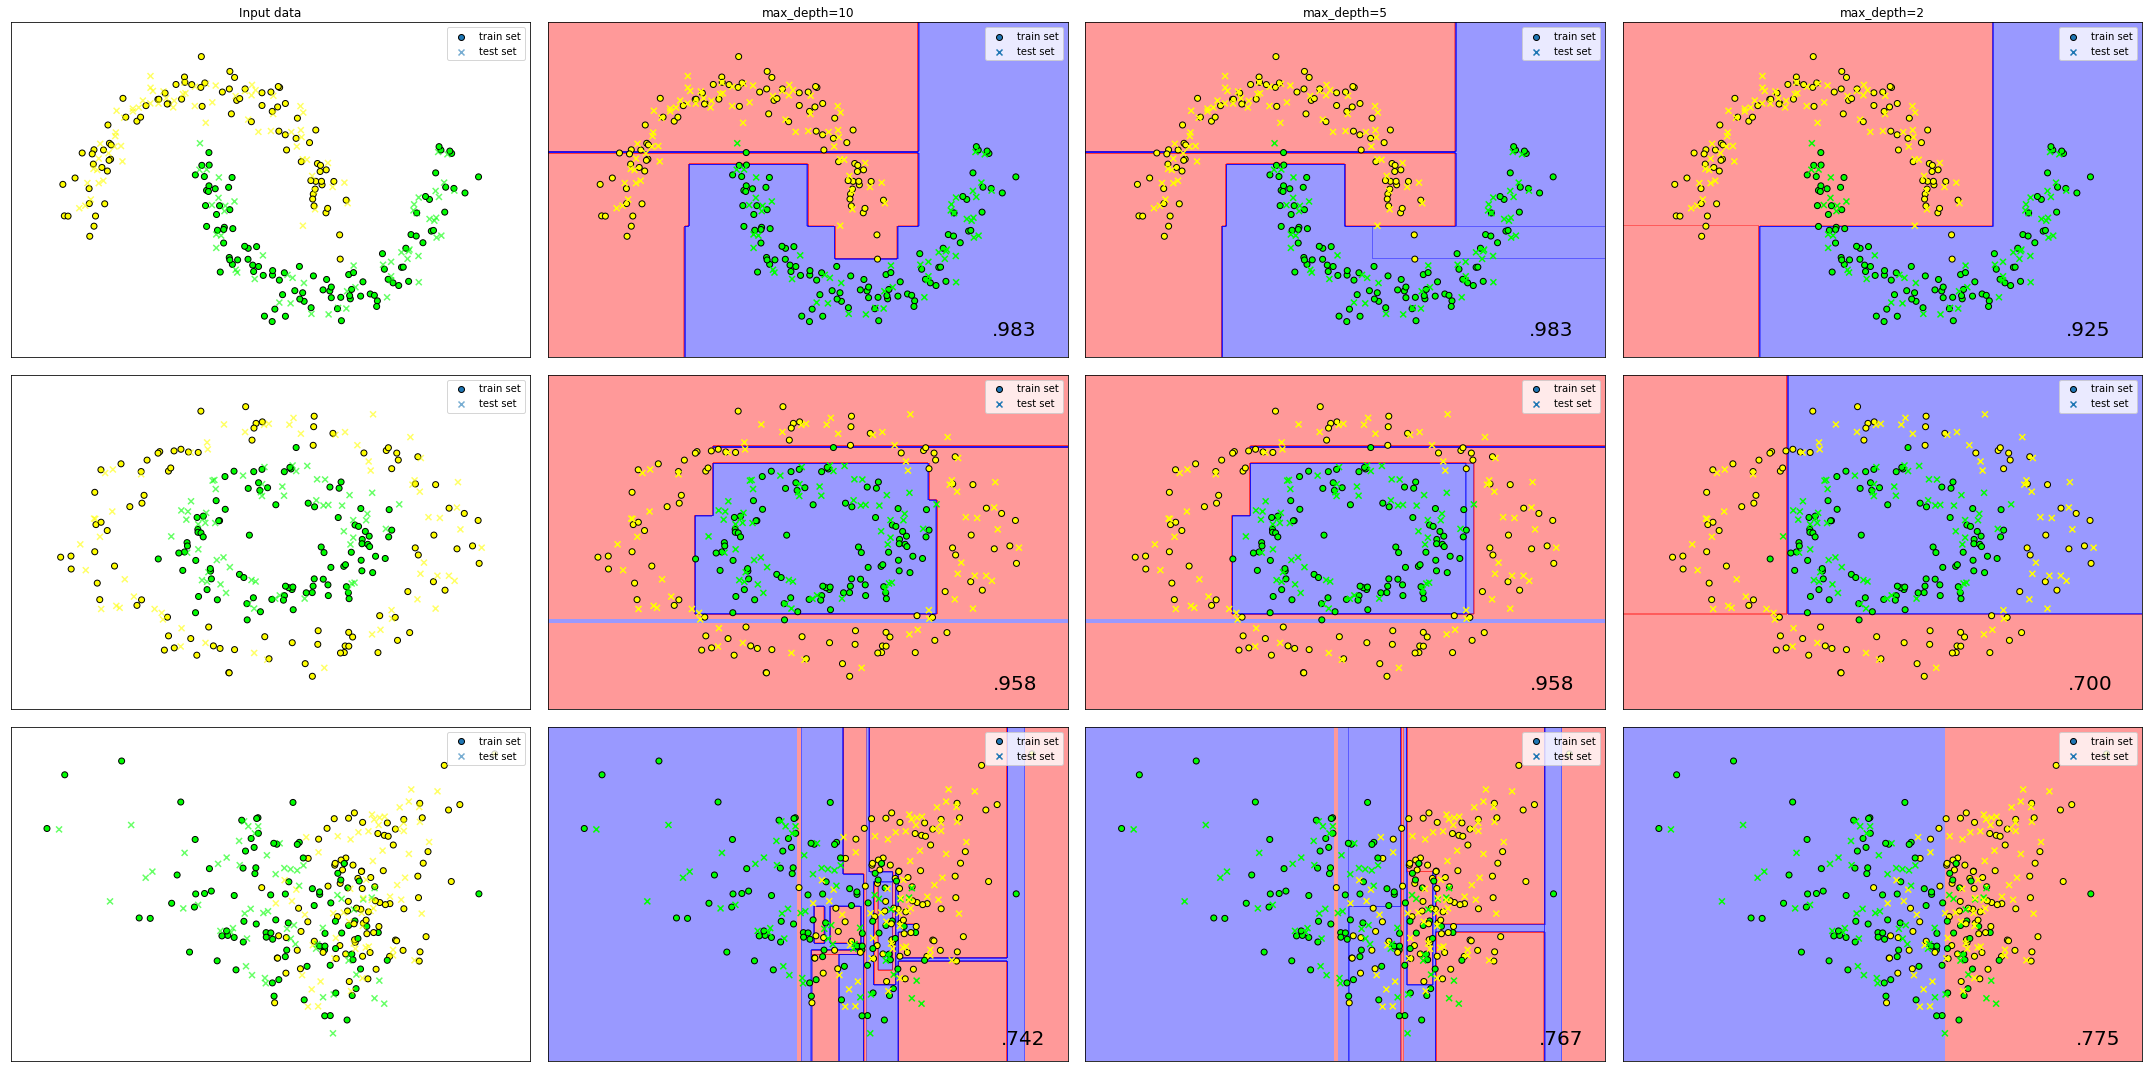

In [18]:
#设置显示结果的图的标题
names=["max_depth=10","max_depth=5","max_depth=2"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    DecisionTreeClassifier(random_state=0,max_depth=10),
    DecisionTreeClassifier(random_state=0,max_depth=5),
    DecisionTreeClassifier(random_state=0,max_depth=2),]
#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_samples=300,n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
print(X.shape)
#生成X：形状[n_samples，n_features]生成的样本。y：形状数组[n_samples]每个样本的类成员的整数标签。
#这里类别为2（没有分支） 特征为2
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集
#print(linearly_separable)
#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(n_samples=300,noise=0.1,random_state=0),
         make_circles(n_samples=300,noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(30,15))
i=1
for ds_cnt,ds in enumerate(datasets):
#enumerate()函数:用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    #处理数据集
    #print(ds)--ds代表对应的数据，共有3组
    #print(ds_cnt)--ds_cnt代表对应的组号，分别为0，1，2
    X,y=ds#X为特征，y为标签,循环3次，每次为1次标签
    #print(i,"  ",X,'\n')
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5 #取第一个取值特征范围作为横轴
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5 #取第二个取值特征范围作为纵轴
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h), #按步长在横纵轴上设置网络
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FFFF00','#00FF00'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面 3 4 1    345   349分别为第1，5，9子图
    #print(len(datasets),len(classifiers)+1,i)
    if ds_cnt==0:
        ax.set_title("Input data")#初始标题
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    print(y_train.dtype)
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc = 1)#添加图例
    i+=1
    for name,clf in list(zip(names,classifiers)):#name ,classifiers为初始定义的类别
        #print(name,classifiers)
        #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        #print(len(datasets),len(classifiers)+1,i) 232 233 234
        clf.fit(X_train,y_train)#训练集训练分类器
        print(X_train.shape,y_train.shape)
        score=clf.score(X_test,y_test)#测试集测试分类器
        #hasattr用于是否包含属性的判定
        if hasattr(clf,"decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        #将分类结果利用contourf（等高线）函数画出
        Z=Z.reshape(xx.shape)#形状的统一
        #print(Z.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.4)#等高线的绘制
        #画训练集点
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
                   edgecolors='k',marker='o',label='train set')
        #画测试集点
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,
                   edgecolors='k',marker='x',label='test set')
        #画坐标轴
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend(loc = 1)#添加图例
        if ds_cnt==0:
            #画子图标题
            ax.set_title(name)
            #显示测试正确率
        ax.text(xx.max()-.3,yy.min()+.3,('%.3f'% score).lstrip('0'), 
                size=20,horizontalalignment='right')
        i += 1

#分别对每个数据集做训练及测试

 
plt.tight_layout()
plt.show()


##### 总结：max_depth 用于限制树的最大深度，是用的最广的参数，在高维度低样本时非常有效。一般来说，当数据少或着特征少的时候此数值可以忽略；如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。决策树多生长一层，对样本的需求会增加一倍，所以限制层数能够有效限制过拟合。如果参数太小，可能会欠拟合，但是数字太大，可能会过拟合；通过准确率的显示也可以看出并非深度越深，数据集的分类结果会越准确，因此实际应用时需要根据数据集数目及类型选择恰当的决策树深度。

### 2.2朴素贝叶斯分类器的先验概率修改对于分类的影响
###### 参考文章https://www.jianshu.com/p/1d2a22db6235
###### https://zhuanlan.zhihu.com/p/25493221
###### https://www.cnblogs.com/lsm-boke/p/12317741.html

##### 在scikit-learn中，一共有3个朴素贝叶斯的分类算法类。分别是GaussianNB，MultinomialNB和BernoulliNB。这三个类适用的分类场景各不相同，主要根据数据类型来进行模型的选择。
1. GaussianNB：先验为高斯分布的朴素贝叶斯，样本特征的分布大部分是连续值。
2. MultinomialNB：先验为多项式分布的朴素贝叶斯，样本特征的大部分是多元离散值。
3. BernoulliNB：先验为伯努利分布的朴素贝叶斯，样本特征二元离散值或者很稀疏的多元离散值。


1. 贝叶斯决策论是概率框架下实施决策的基本方法，而贝叶斯分类器的理论框架基于贝叶斯决策论。对于分类任务，在所有相关概率都已知的情况下，贝叶斯决策论考虑如何基于这些概率和误判损失来选择最优的类别标记。
2. 先验概率：根据以往的经验和分析得到的概率，也即根据客观事实和统计频率得出的概率；
3. 条件概率：在某种条件下某件事发生的概率；
4. 后验概率：事件已经发生，而要得到这件事情发生的原因是某个因素引起的可能性，即由结果推原因。
5. 贝叶斯判定准则：决策目标是最小化总体风险，即分类器错误率，于是要对每个样本x选择使得后验概率P(c|x)最大的类别标记（即使条件风险R(c|x)最小的类别标记）
6. 贝叶斯分类器使用生成式模型的策略（朴素贝叶斯）
7. 生成式模型：对联合概率分布P(x,c)先建立模型，再得到P(c|x)
8. 判别式模型：给定了x，然后建立模型P(c|x)来预测c


(60, 2)
int64
(60, 2)
int64
(60, 2)
int32


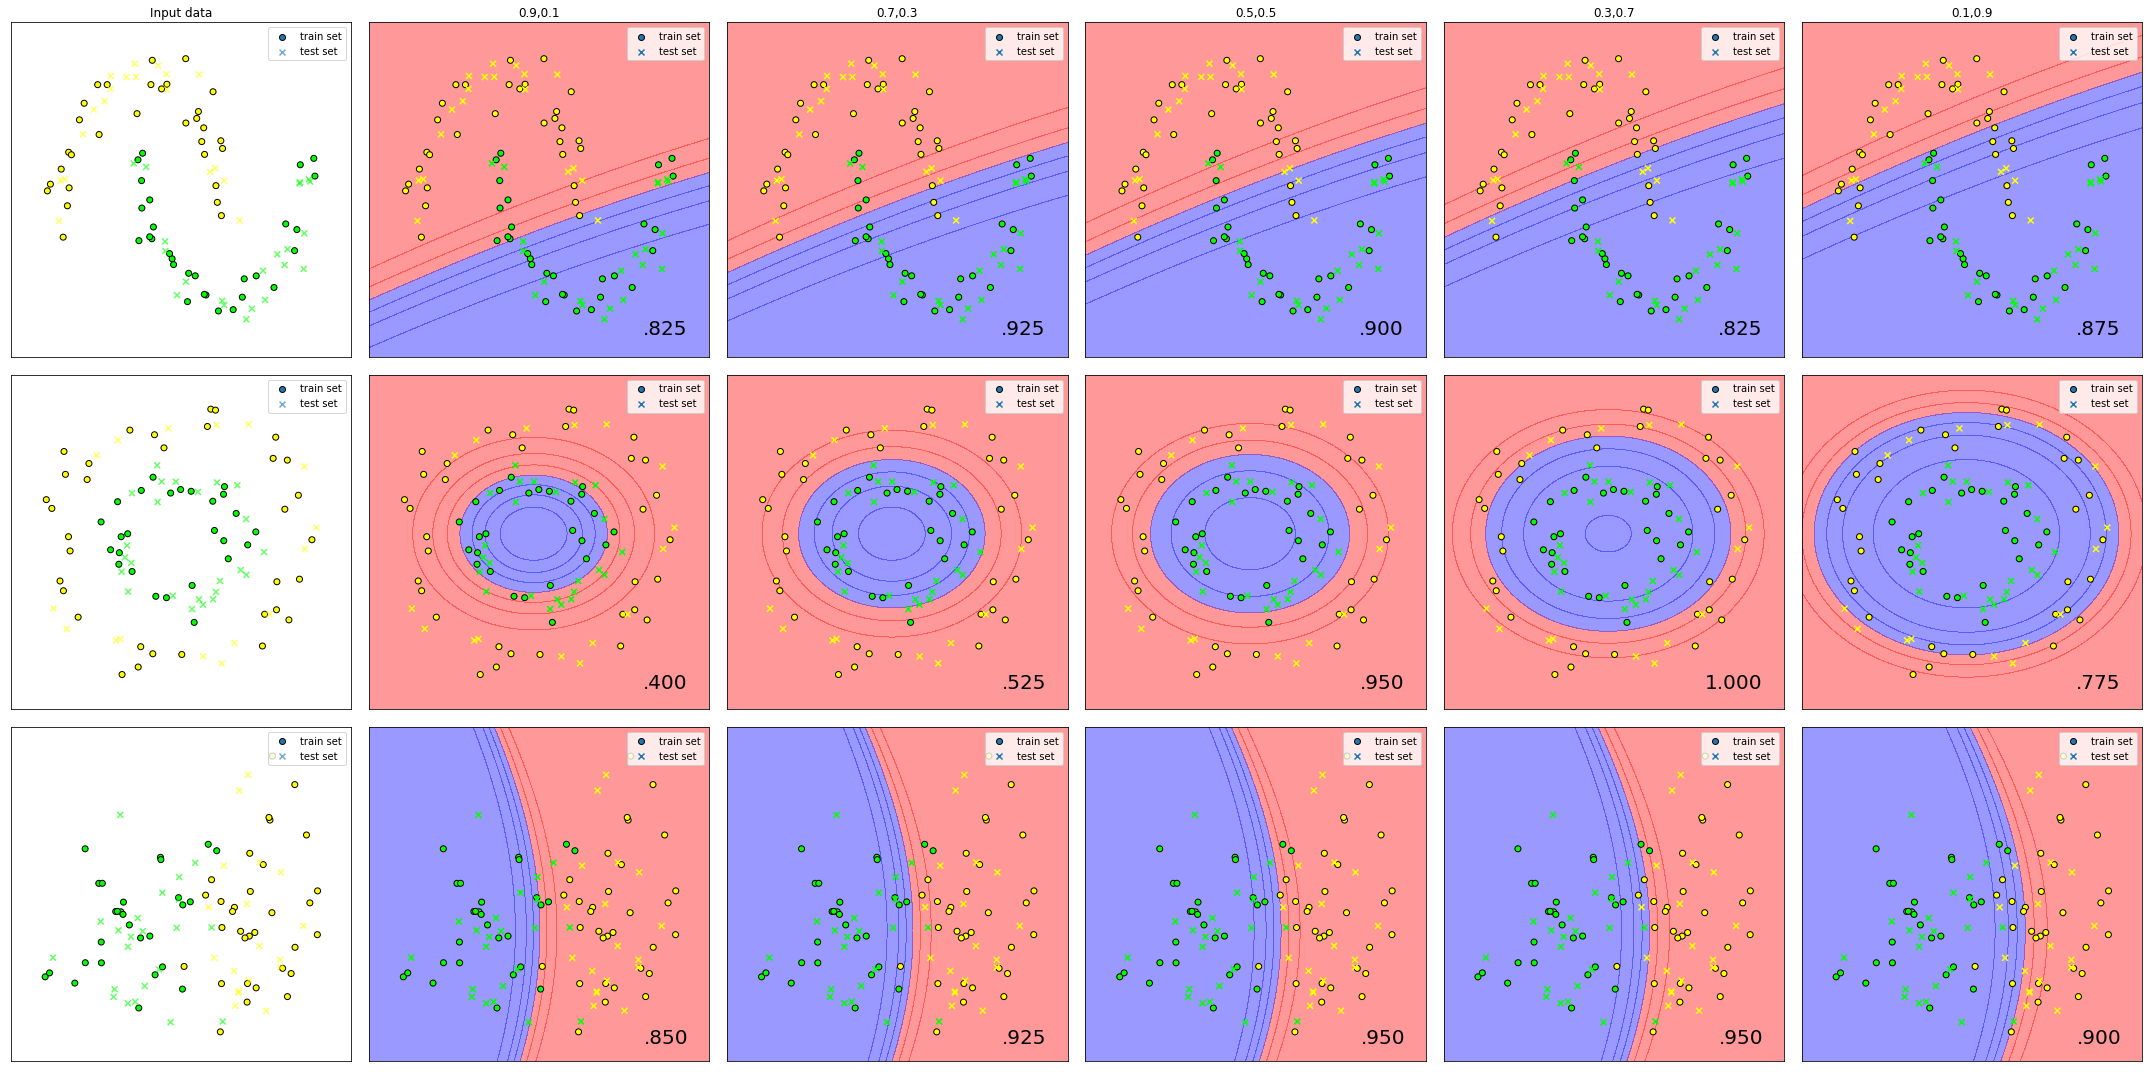

In [25]:
#设置显示结果的图的标题
names=["0.9,0.1","0.7,0.3","0.5,0.5","0.3,0.7","0.1,0.9"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    GaussianNB(priors=[0.9,0.1]),GaussianNB(priors=[0.7,0.3]),GaussianNB(priors=[0.5,0.5]),GaussianNB(priors=[0.3,0.7]),GaussianNB(priors=[0.1,0.9])]
#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
#print(X,y)
#生成X：形状[n_samples，n_features]生成的样本。y：形状数组[n_samples]每个样本的类成员的整数标签。
#这里类别为2（没有分支） 特征为2
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集
#print(linearly_separable)
#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(30,15))
i=1
for ds_cnt,ds in enumerate(datasets):
#enumerate()函数:用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    #处理数据集
    #print(ds)--ds代表对应的数据，共有3组
    #print(ds_cnt)--ds_cnt代表对应的组号，分别为0，1，2
    X,y=ds#X为特征，y为标签,循环3次，每次为1次标签
    #print(i,"  ",X,'\n')
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    print(X_train.shape)
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5 #取第一个取值特征范围作为横轴
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5 #取第二个取值特征范围作为纵轴
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h), #按步长在横纵轴上设置网络
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FFFF00','#00FF00'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面 3 4 1    345   349分别为第1，5，9子图
    #print(len(datasets),len(classifiers)+1,i)
    if ds_cnt==0:
        ax.set_title("Input data")#初始标题
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    print(y_train.dtype)
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc = 1)#添加图例
    i+=1
    for name,clf in list(zip(names,classifiers)):#name ,classifiers为初始定义的类别
        #print(name,classifiers)
        #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        #print(len(datasets),len(classifiers)+1,i) 232 233 234
        clf.fit(X_train,y_train)#训练集训练分类器
        #print(X_train.shape,y_train)
        score=clf.score(X_test,y_test)#测试集测试分类器
        #hasattr用于是否包含属性的判定
        if hasattr(clf,"decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        #将分类结果利用contourf（等高线）函数画出
        Z=Z.reshape(xx.shape)#形状的统一
        #print(Z.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.4)#等高线的绘制
        #画训练集点
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
                   edgecolors='k',marker='o',label='train set')
        #画测试集点
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,
                   edgecolors='k',marker='x',label='test set')
        #画坐标轴
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend(loc = 1)#添加图例
        if ds_cnt==0:
            #画子图标题
            ax.set_title(name)
            #显示测试正确率
        ax.text(xx.max()-.3,yy.min()+.3,('%.3f'% score).lstrip('0'), 
                size=20,horizontalalignment='right')
        i += 1

#分别对每个数据集做训练及测试

 
plt.tight_layout()
plt.show()


###### 总结 修改不同的先验概率，划分结果与准确率都发生了改变，由于先验概率是根据以前的知识和经验得出的样本出现的概率，这对应于我们划分训练集时，对应标签的样本数据量占总的样本量的概率，因此将先验概率设定为一致时，得到的分类结果此时最好。

### 2.3支持向量分类器不同核函数对于结果的影响
######    Kernel：算法中采用的核函数类型，核函数是用来将非线性问题转化为线性问题的一种方法。
1. 参数选择有RBF, Linear, Poly, Sigmoid, precomputed或者自定义一个核函数。
2. C：惩罚系数，用来控制损失函数的惩罚系数，类似于LR中的正则化系数。
3. 对于不同的数据集，需要采取不同的核函数，否则分类效果将不会很好

##### 参考文章https://blog.csdn.net/qq_29462849/article/details/89516133
1. 线性核
优点：
方案首选，奥卡姆剃刀定律
简单，可以求解较快一个QP问题
可解释性强：可以轻易知道哪些feature是重要的
限制：只能解决线性可分问题
2. 多项式核
基本原理：依靠升维使得原本线性不可分的数据线性可分；
升维的意义：使得原本线性不可分的数据线性可分；
优点：
可解决非线性问题
可通过主观设置幂数来实现总结的预判
缺点：
对于大数量级的幂数，不太适用
比较多的参数要选择
3. 高斯核
优点：
可以映射到无限维
决策边界更为多样
只有一个参数，相比多项式核容易选择
缺点：
可解释性差(无限多维的转换，无法算w)
计算速度比较慢(解一个对偶问题)
容易过拟合(参数选不好时容易overfitting)
4. Sigmoid核
采用Sigmoid函数作为核函数时，支持向量机实现的就是一种多层感知器神经网络，应用SVM方法，隐含层节点数目(它确定神经网络的结构)、隐含层节点对输入节点的权值都是在设计(训练)的过程中自动确定的。而且支持向量机的理论基础决定了它最终求得的是全局最优值而不是局部最小值，也保证了它对于未知样本的良好泛化能力而不会出现过学习现象。
在实战中更多的是：
特征维数高选择线性核
样本数量可观、特征少选择高斯核（非线性核）
样本数量非常多选择线性核（避免造成庞大的计算量）

(60, 2)
int64
(60, 2)
int64
(60, 2)
int32


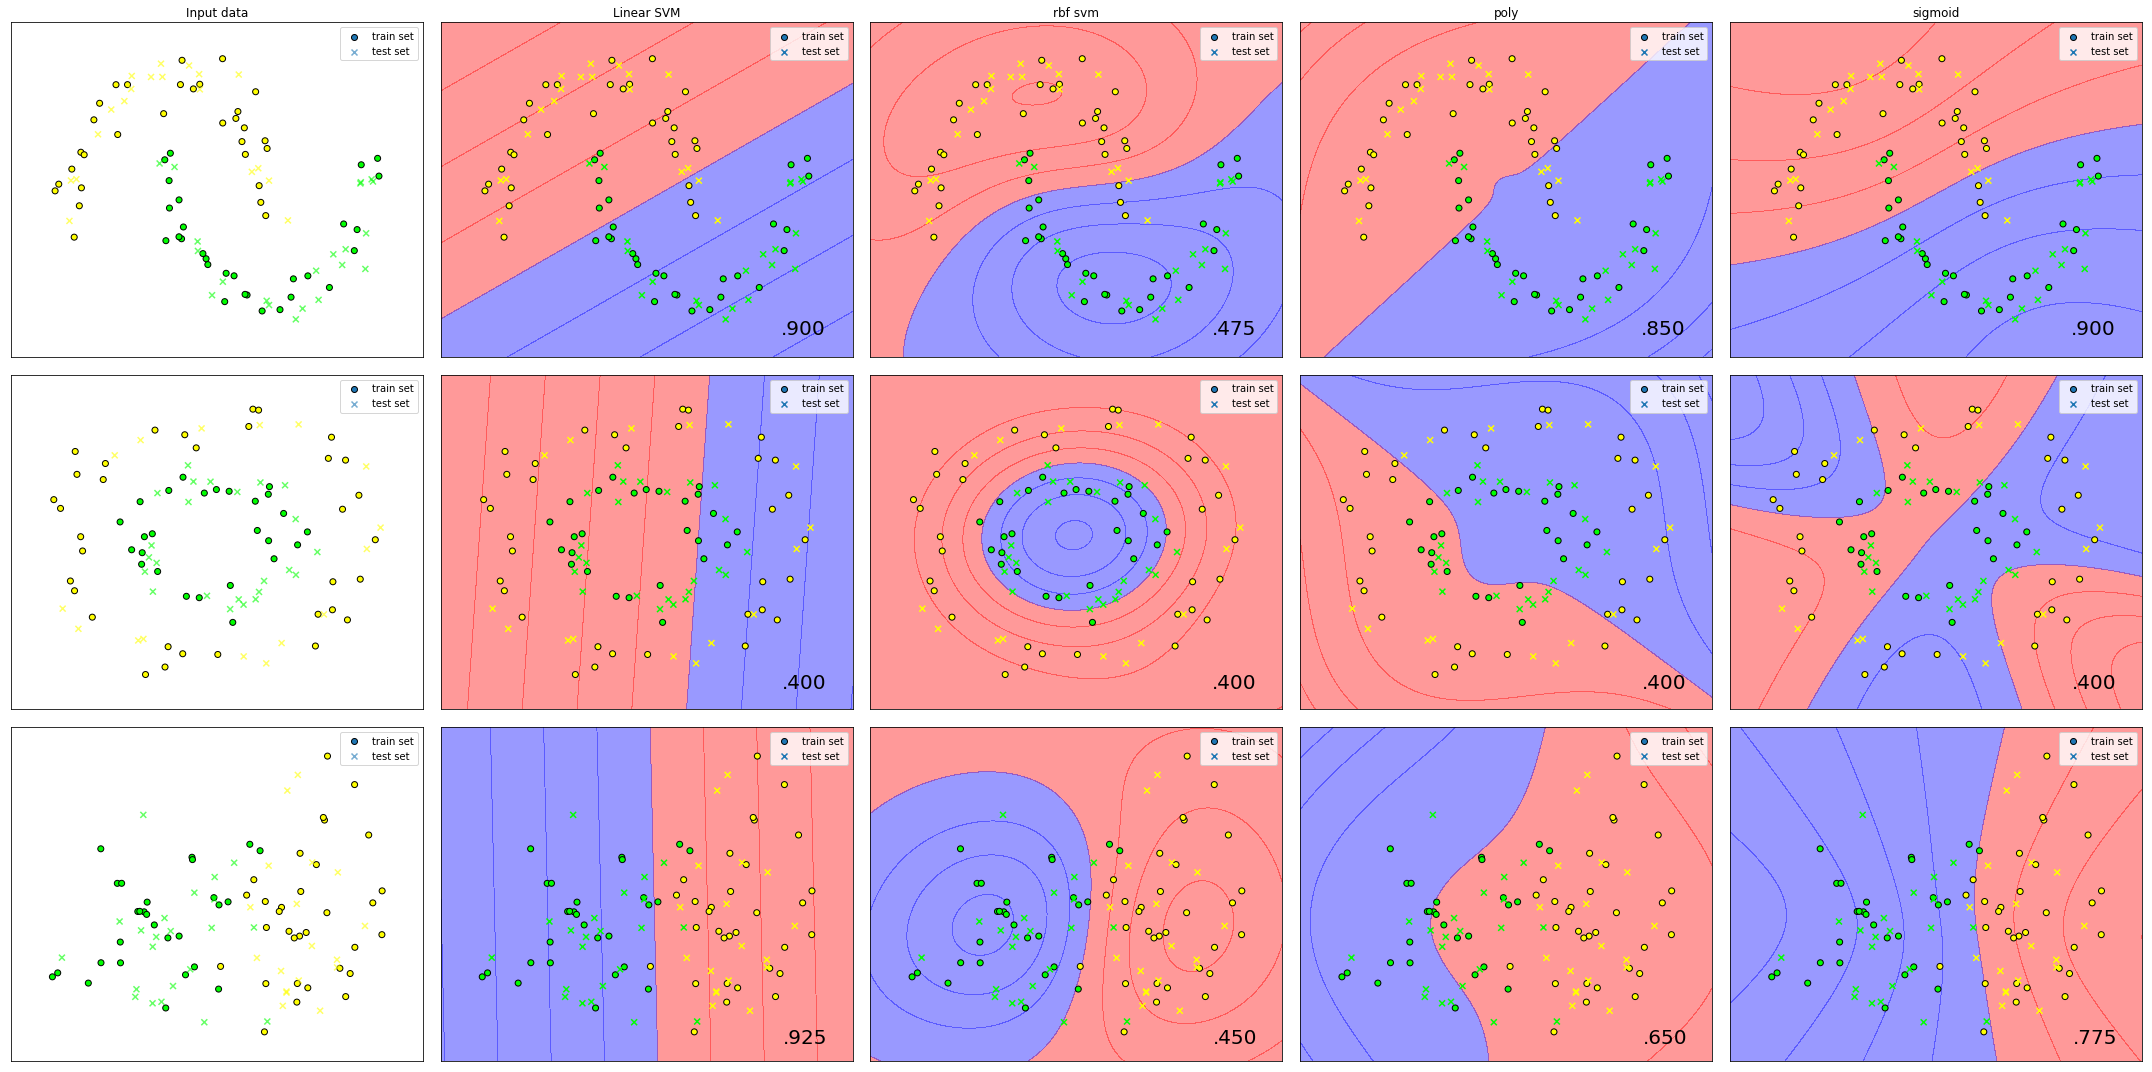

In [27]:

#设置显示结果的图的标题
names=["Linear SVM","rbf svm","poly","sigmoid"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    SVC(kernel="linear",C=0.025),
    SVC(kernel="rbf",C=0.025),
    #SVC(kernel="precomputed",C=0.025),
    SVC(kernel="poly",C=0.025),
    SVC(kernel="sigmoid",C=0.025),]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
#print(X,y)
#生成X：形状[n_samples，n_features]生成的样本。y：形状数组[n_samples]每个样本的类成员的整数标签。
#这里类别为2（没有分支） 特征为2
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集
#print(linearly_separable)
#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(30,15))
i=1
for ds_cnt,ds in enumerate(datasets):
#enumerate()函数:用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    #处理数据集
    #print(ds)--ds代表对应的数据，共有3组
    #print(ds_cnt)--ds_cnt代表对应的组号，分别为0，1，2
    X,y=ds#X为特征，y为标签,循环3次，每次为1次标签
    #print(i,"  ",X,'\n')
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    print(X_train.shape)
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5 #取第一个取值特征范围作为横轴
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5 #取第二个取值特征范围作为纵轴
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h), #按步长在横纵轴上设置网络
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FFFF00','#00FF00'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面 3 4 1    345   349分别为第1，5，9子图
    #print(len(datasets),len(classifiers)+1,i)
    if ds_cnt==0:
        ax.set_title("Input data")#初始标题
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    print(y_train.dtype)
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc = 1)#添加图例
    i+=1
    for name,clf in list(zip(names,classifiers)):#name ,classifiers为初始定义的类别
        #print(name,classifiers)
        #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        #print(len(datasets),len(classifiers)+1,i) 232 233 234
        clf.fit(X_train,y_train)#训练集训练分类器
        #print(X_train.shape,y_train)
        score=clf.score(X_test,y_test)#测试集测试分类器
        #hasattr用于是否包含属性的判定
        if hasattr(clf,"decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        #将分类结果利用contourf（等高线）函数画出
        Z=Z.reshape(xx.shape)#形状的统一
        #print(Z.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.4)#等高线的绘制
        #画训练集点
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
                   edgecolors='k',marker='o',label='train set')
        #画测试集点
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,
                   edgecolors='k',marker='x',label='test set')
        #画坐标轴
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend(loc = 1)#添加图例
        if ds_cnt==0:
            #画子图标题
            ax.set_title(name)
            #显示测试正确率
        ax.text(xx.max()-.3,yy.min()+.3,('%.3f'% score).lstrip('0'), 
                size=20,horizontalalignment='right')
        i += 1

#分别对每个数据集做训练及测试

 
plt.tight_layout()
plt.show()


### 2.4其他分类方法的效果的对比分析（K近邻，随机森林等）

###### K近邻算法https://blog.csdn.net/u014465639/article/details/71342072
###### K近邻算法简单，通过计算欧式距离最近的K个点来确定分类结果，但是对于大型数据集来说，由于运算量较大几乎不可实现。
###### 随机森林分类https://blog.csdn.net/w952470866/article/details/78987265
###### 随机森林算法是常用的集成学习算法。 集成算法用一些相对较弱的分类器，独立地就同一批的样本进行训练，然后把各自的学习结果按某种方式整合起来，进行预测。它适合数据集的各个子样本上的多个决策树分类器，并使用平均值来提高预测精度和控制过度拟合。

(60, 2)
int64
(60, 2)
int64
(60, 2)
int32


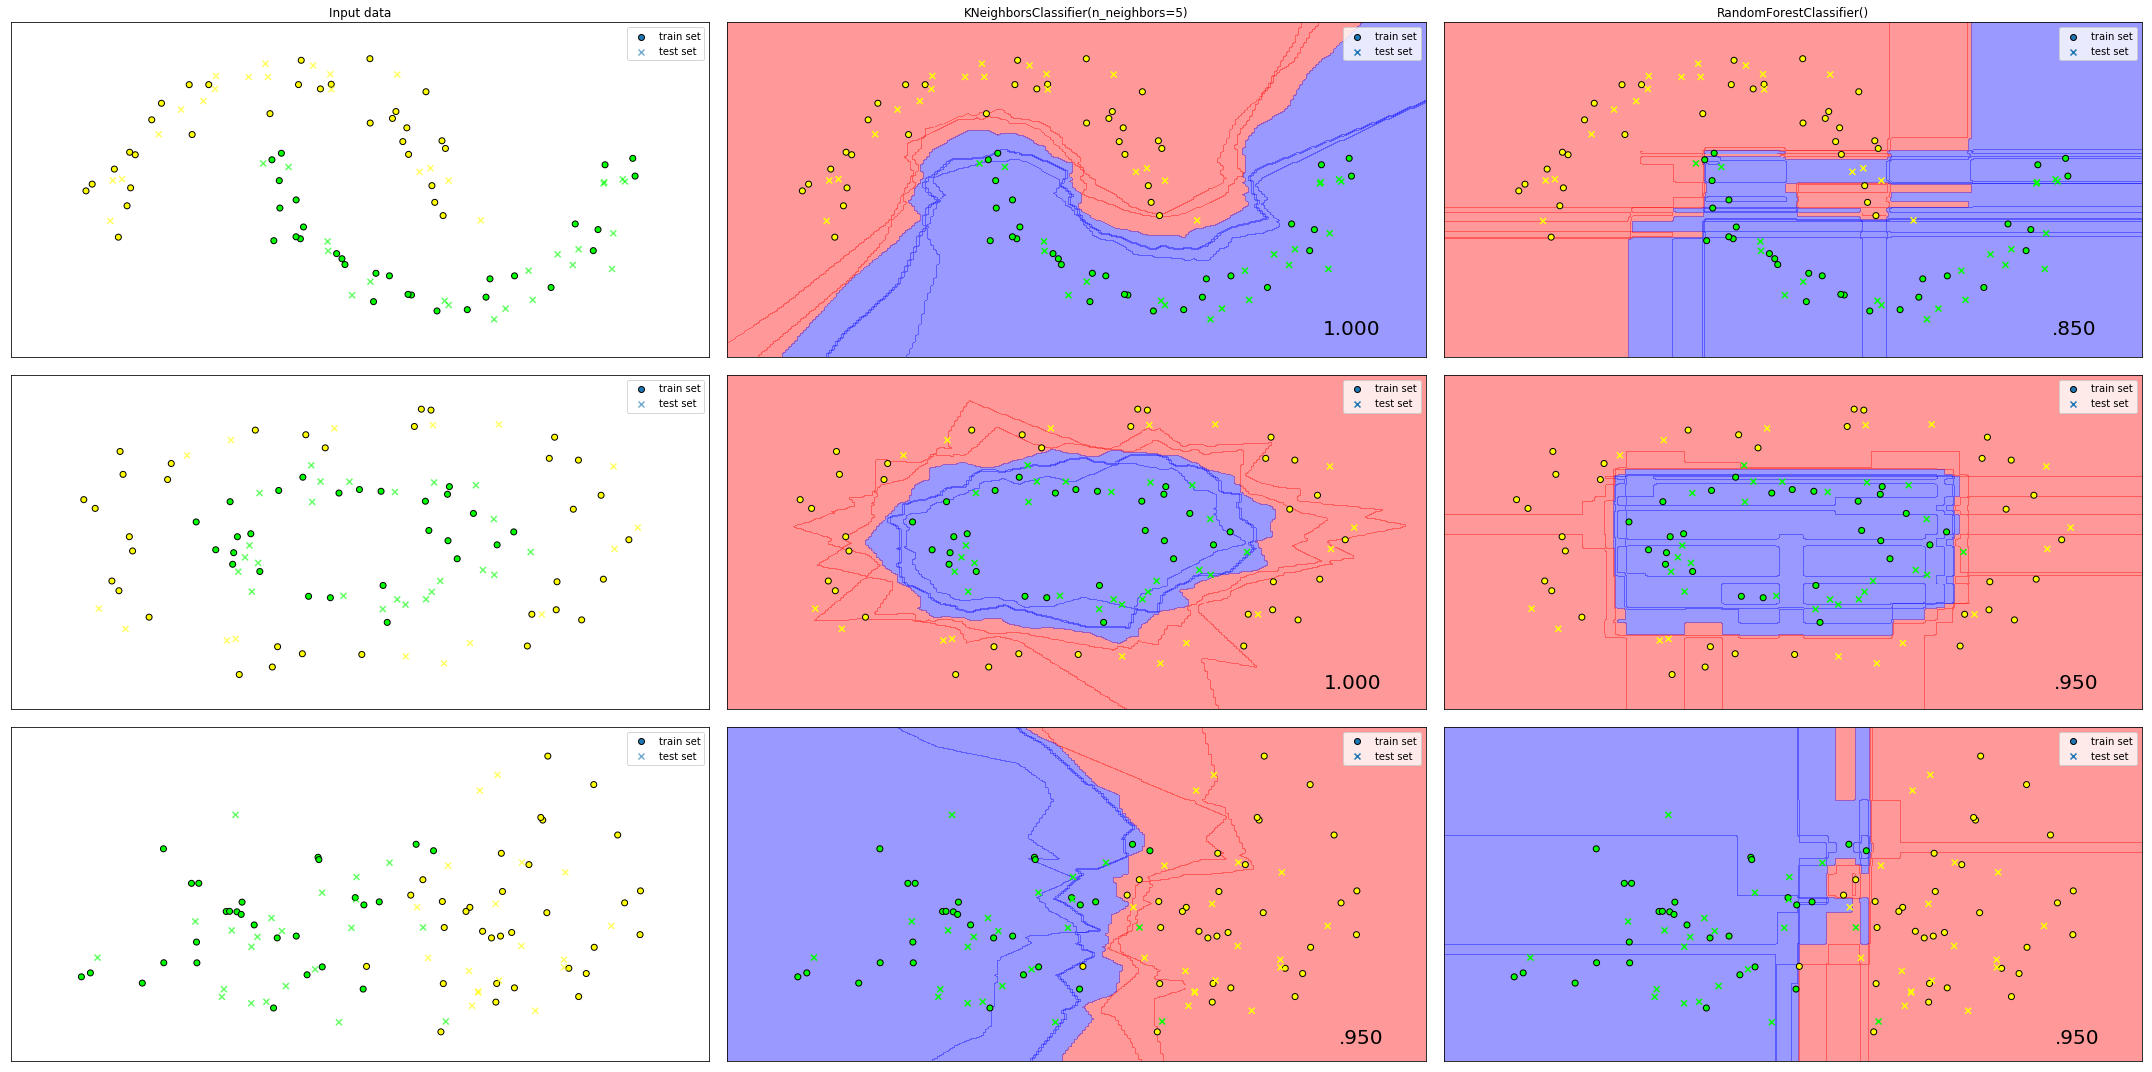

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#设置显示结果的图的标题
names=["KNeighborsClassifier(n_neighbors=5)","RandomForestClassifier()"]
#设置分类器，用到线性SVM，决策树，朴素贝叶斯
classifiers=[
    KNeighborsClassifier(n_neighbors=5),
    RandomForestClassifier()]

#设置一个用于分类的数据集，这里设置为线型可分的数据集，输入变量设置为两个特征
X,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                        random_state=1,n_clusters_per_class=1)
#print(X,y)
#生成X：形状[n_samples，n_features]生成的样本。y：形状数组[n_samples]每个样本的类成员的整数标签。
#这里类别为2（没有分支） 特征为2
rng=np.random.RandomState(2)#设置一个伪随机数种子
X+=2*rng.uniform(size=X.shape)#对x变量上加随机扰动
linearly_separable=(X,y)#将上述得到的x，y构建为一个线性可分的数据集
#print(linearly_separable)
#选择三个数据集
#make_moons数据呈月牙状
#make_circles数据呈环状
#linearly_separable前面设置的线性可分数据集
datasets=[make_moons(noise=0.1,random_state=0),
         make_circles(noise=0.1,factor=0.5,random_state=1),
         linearly_separable
         ]
#设置显示结果图的大小
figure=plt.figure(figsize=(30,15))
i=1
for ds_cnt,ds in enumerate(datasets):
#enumerate()函数:用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中。
    #处理数据集
    #print(ds)--ds代表对应的数据，共有3组
    #print(ds_cnt)--ds_cnt代表对应的组号，分别为0，1，2
    X,y=ds#X为特征，y为标签,循环3次，每次为1次标签
    #print(i,"  ",X,'\n')
    X=StandardScaler().fit_transform(X)#标准化数据
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=42)#分割数据集
    print(X_train.shape)
    x_min,x_max=X[:,0].min()-.5,X[:,0].max()+.5 #取第一个取值特征范围作为横轴
    y_min,y_max=X[:,1].min()-.5,X[:,1].max()+.5 #取第二个取值特征范围作为纵轴
    h=.02 #设置网络的步长
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h), #按步长在横纵轴上设置网络
                      np.arange(y_min,y_max,h))
    #先展示输入数据集
    cm=ListedColormap((['red','blue']))#设置分割面颜色
    cm_bright=ListedColormap(['#FFFF00','#00FF00'])#设置散点颜色
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)#划分子面 3 4 1    345   349分别为第1，5，9子图
    #print(len(datasets),len(classifiers)+1,i)
    if ds_cnt==0:
        ax.set_title("Input data")#初始标题
        #画训练集散点
    ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
               edgecolors='k',marker='o',label='train set')
    print(y_train.dtype)
    #画测试集散点
    ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,
               edgecolors='k',marker='x',label='test set')
    #画坐标轴
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend(loc = 1)#添加图例
    i+=1
    for name,clf in list(zip(names,classifiers)):#name ,classifiers为初始定义的类别
        #print(name,classifiers)
        #zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        #print(len(datasets),len(classifiers)+1,i) 232 233 234
        clf.fit(X_train,y_train)#训练集训练分类器
        #print(X_train.shape,y_train)
        score=clf.score(X_test,y_test)#测试集测试分类器
        #hasattr用于是否包含属性的判定
        if hasattr(clf,"decision_function"):
            Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
        #将分类结果利用contourf（等高线）函数画出
        Z=Z.reshape(xx.shape)#形状的统一
        #print(Z.shape)
        ax.contourf(xx,yy,Z,cmap=cm,alpha=.4)#等高线的绘制
        #画训练集点
        ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cm_bright,
                   edgecolors='k',marker='o',label='train set')
        #画测试集点
        ax.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cm_bright,
                   edgecolors='k',marker='x',label='test set')
        #画坐标轴
        ax.set_xlim(xx.min(),xx.max())
        ax.set_ylim(yy.min(),yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.legend(loc = 1)#添加图例
        if ds_cnt==0:
            #画子图标题
            ax.set_title(name)
            #显示测试正确率
        ax.text(xx.max()-.3,yy.min()+.3,('%.3f'% score).lstrip('0'), 
                size=20,horizontalalignment='right')
        i += 1

#分别对每个数据集做训练及测试

 
plt.tight_layout()
plt.show()


## 其他参数设定--官网学习
### svc
class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, 
verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, 
random_state=None)
### DecisionTreeClassifier
sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, 
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features=None, random_state=None, max_leaf_nodes=None, 
min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, 
presort='deprecated', ccp_alpha=0.0)
### 朴素贝叶斯分类器
sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)
